# Why do you divide a sample variance by (n-1)?
---
### If you are familiar with basic statistics, you may recall that in order to solve for population variance you must sum up all the squared differences between each data point and the mean, then divide it by number of observations. For some reason when finding a sample variance to apporximate a population variance, you must divide by (n-1). In this program we take a look as to why this is.

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot
# %matplotlib inline

In [2]:
# pass in a list and a number for how many samples you want to take
def make_normal_population(mean, stdev, n):
    #make population
    s = np.random.normal(mean,stdev,n)
    
    #plot the population distribution on a histogram
    fig = matplotlib.pyplot.figure()
    matplotlib.pyplot.hist(s, bins=50)
    fig.suptitle('Population', fontsize=15)
    matplotlib.pyplot.xlabel("Number")
    matplotlib.pyplot.ylabel("Frequency")
    
    #return an array with the population
    return s

Population n = 1000
Population Mean = 50.25302786976854
Population Variance = 27.169226496766324
Population Standard Deviation = 5.212410814274555


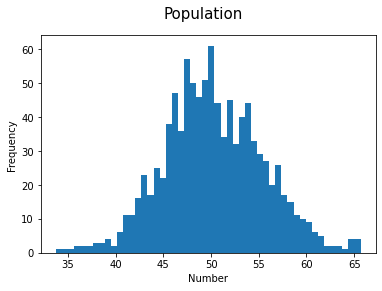

In [3]:
#create a population
n = 1000
mean = 50
stdev = 5
population = make_normal_population(mean,stdev,n)

#Calculate and show population statistics
population_variance = np.var(population)
population_std = np.std(population)
population_mean = np.mean(population)
print(f"Population n = {n}")
print(f"Population Mean = {population_mean}")
print(f"Population Variance = {population_variance}")
print(f"Population Standard Deviation = {population_std}")

In [32]:
#define a function that will take an n number of samples from the population, each with a fixed 10 sample size. Will return a dataFrame full of average variances and means for these samples. will have n rows.
def get_sample_variances(n):
    #initiate the lists that we will later pass into DataFrames. Also initiate that DataFrame
    biased_sample_var_list = []
    sample_var_list = []
    sample_mean_list = []
    var_list = pd.DataFrame()

    #take n samples from the popuation. Each sample size is 10
    #make a DataFrame with all of the sample Variances and Means
    for x in range(n):
        sample = random.sample(population.tolist(),10)
        sample_mean_list.append(np.mean(sample))
        biased_sample_var_list.append(np.var(sample))
        sample_var_list.append(np.var(sample, ddof=1))

    var_list["Sample Mean"] = sample_mean_list
    var_list["Biased Sample Variances"] = biased_sample_var_list
    var_list["Sample Variances"] = sample_var_list
    
    
    #Show on a graph that when you take 100 samples (sample size 10 as mentioned above), the unbiased variance is much closer to the population variation than the biased variance. This relationship will only get stronger as n gets higher than 100.
    if(n==100):
        fig = matplotlib.pyplot.figure(figsize = (15,10))
        matplotlib.pyplot.scatter(y = var_list["Biased Sample Variances"], x = var_list["Sample Mean"])
        matplotlib.pyplot.scatter(y = var_list["Sample Variances"], x = var_list["Sample Mean"], color="red")
        matplotlib.pyplot.axhline(y = population_variance, color="green", label ="Population")
        matplotlib.pyplot.axhline(y = var_list["Biased Sample Variances"].mean(), label ="Biased Sample")
        matplotlib.pyplot.axhline(y = var_list["Sample Variances"].mean(), label ="Sample", color="red")
        matplotlib.pyplot.axvline(x = population_mean, color="green")
        matplotlib.pyplot.xlim(20,80)
        fig.suptitle("Biased Sample Variances/Means vs. Population Variance/Mean", fontsize=15)
        matplotlib.pyplot.legend()



    return var_list

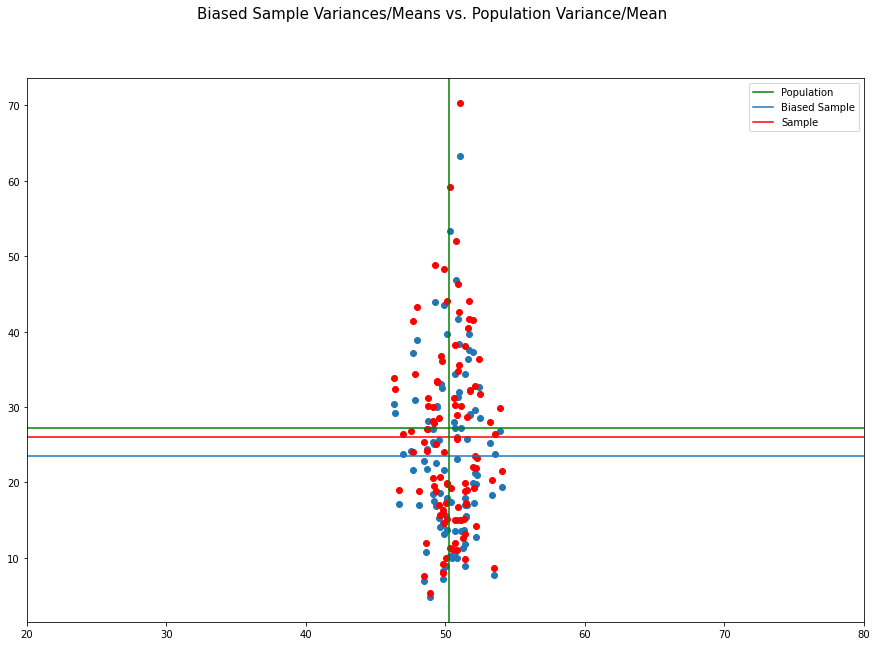

In [40]:
# Will run the get_sample_variances a certain amount of times (1000) with an increasing n , and then save average datas into a new Dataframe. 
aggregate_df = pd.DataFrame(columns = ["Sample Size", "Biased", "Unbiased"])

def addN(n):
    temp = get_sample_variances(n).mean()
    aggregate_df.loc[len(aggregate_df.index)] = [n, temp["Biased Sample Variances"], temp["Sample Variances"]]

for x in range(0,1000):
    addN(x)

Text(0.5, 0.98, 'Biased Sample Vairances')

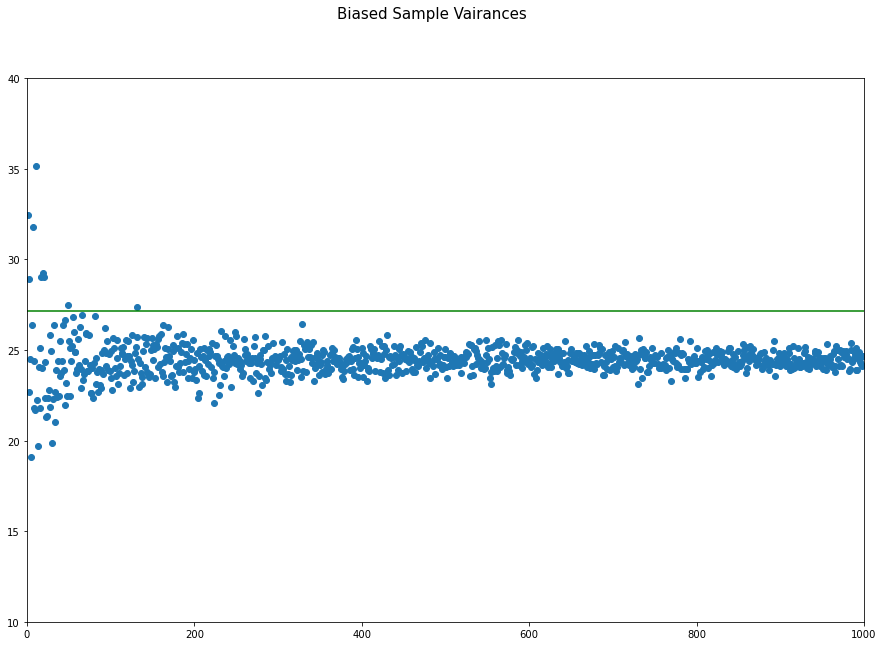

In [41]:
#plot the biased variances
fig = matplotlib.pyplot.figure(figsize = (15,10))
matplotlib.pyplot.scatter(x=aggregate_df["Sample Size"], y=aggregate_df["Biased"])
matplotlib.pyplot.axhline(y = population_variance, color="green", label ="Population")
matplotlib.pyplot.xlim(0,1000)
matplotlib.pyplot.ylim(10,40)
fig.suptitle("Biased Sample Vairances", fontsize = 15)

Text(0.5, 0.98, 'Un-Biased Sample Vairances')

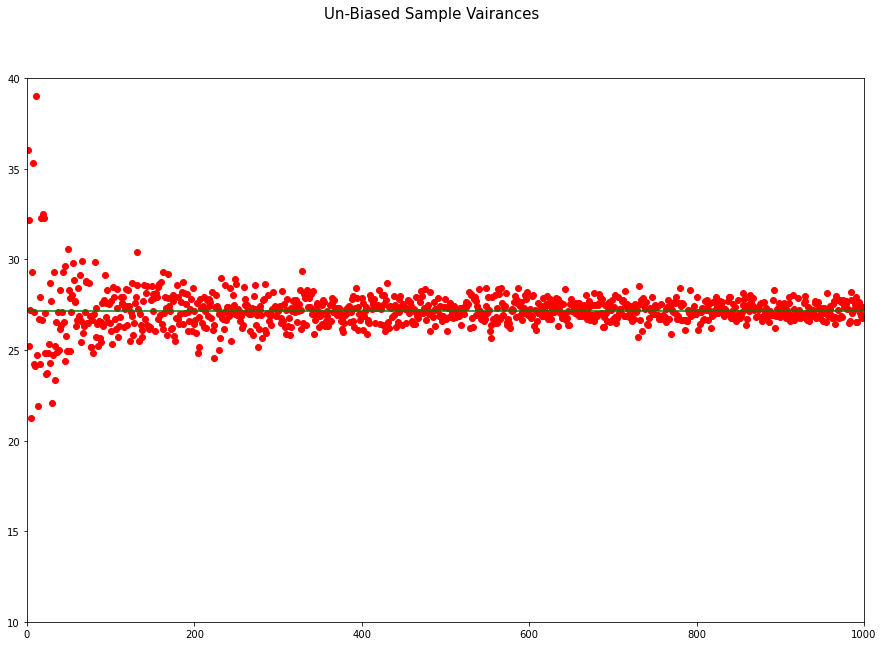

In [42]:
#plot the unbiased varianced
fig = matplotlib.pyplot.figure(figsize = (15,10))
matplotlib.pyplot.scatter(x=aggregate_df["Sample Size"], y=aggregate_df["Unbiased"], color="red")
matplotlib.pyplot.axhline(y = population_variance, color="green", label ="Population")
matplotlib.pyplot.xlim(0,1000)
matplotlib.pyplot.ylim(10,40)
fig.suptitle("Un-Biased Sample Vairances", fontsize = 15)

Text(0.5, 0.98, 'Stacked Sample Variances')

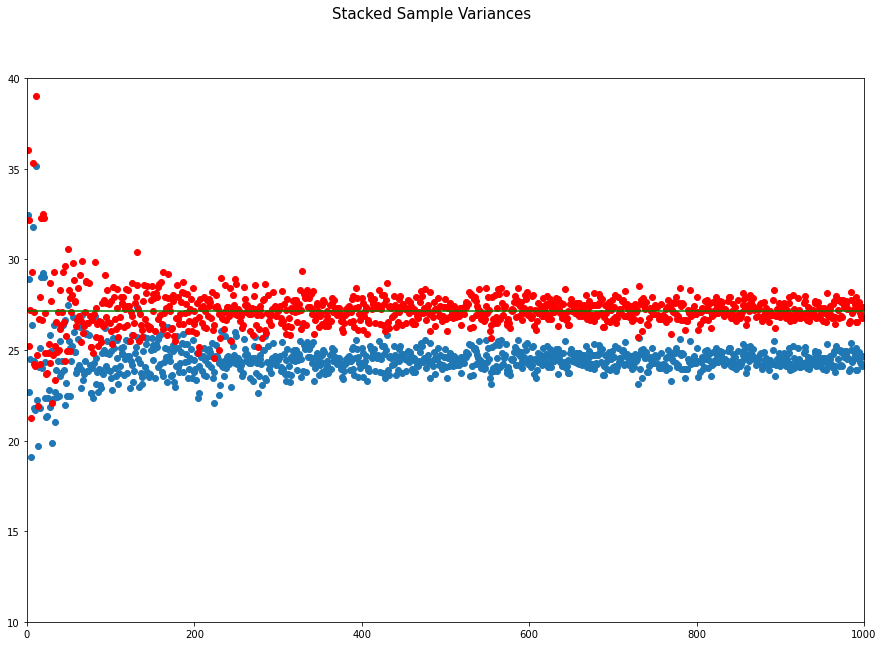

In [43]:
#plot both variances and compare with population variance.
fig = matplotlib.pyplot.figure(figsize = (15,10))
matplotlib.pyplot.scatter(x=aggregate_df["Sample Size"], y=aggregate_df["Biased"])
matplotlib.pyplot.scatter(x=aggregate_df["Sample Size"], y=aggregate_df["Unbiased"], color="red")
matplotlib.pyplot.axhline(y = population_variance, color="green", label ="Population")
matplotlib.pyplot.xlim(0,1000)
matplotlib.pyplot.ylim(10,40)
fig.suptitle("Stacked Sample Variances", fontsize = 15)

## As you can see, the unbiased(n-1) variance, when aggregating a large number of sample variances, produces a very accurate representation of the population variance